In [1]:
%matplotlib notebook

from asteria import config, detector

import astropy.units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('font', size=12)

## Load Configuration

This will load the source configuration from a file.

For this to work, either the user needs to have done one of two things:
1. Run `python setup.py install` in the ASTERIA directory.
2. Run `python setup.py develop` and set the environment variable `ASTERIA` to point to the git source checkout.

If these were not done, the initialization will fail because the paths will not be correctly resolved.

In [2]:
conf = config.load_config('../../data/config/default.yaml')
ic86 = detector.initialize(conf)

In [3]:
doms = ic86.doms_table()
doms

str,i,x,y,z,effvol,type
float32,float32,float64,float64,float64,float64,bytes2
1.0,1.0,-256.14,-521.08,496.07,0.14061218768974065,i3
1.0,2.0,-256.14,-521.08,479.05,0.15195632747592844,i3
1.0,3.0,-256.14,-521.08,462.03,0.1680922220166442,i3
1.0,4.0,-256.14,-521.08,445.01,0.17294657931248547,i3
1.0,5.0,-256.14,-521.08,427.99,0.16979112735610763,i3
1.0,6.0,-256.14,-521.08,410.97,0.1500592745094757,i3
1.0,7.0,-256.14,-521.08,393.95,0.12795153280329327,i3
1.0,8.0,-256.14,-521.08,376.92,0.12487149756118941,i3
1.0,9.0,-256.14,-521.08,359.9,0.13476460232511675,i3


<IPython.core.display.Javascript object>


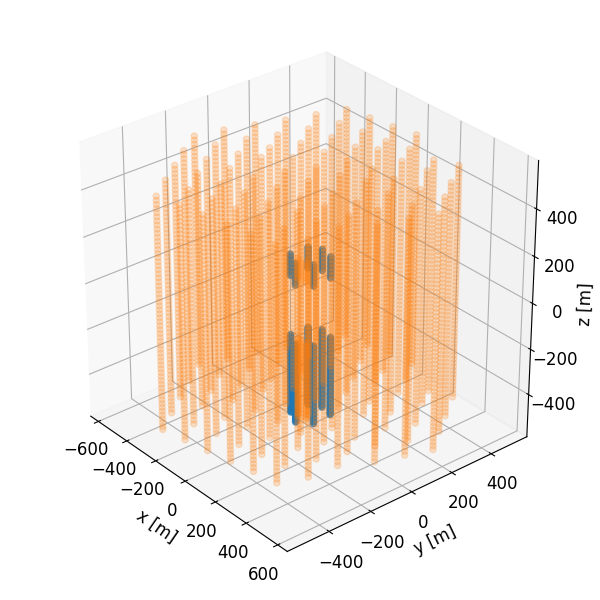

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the DeepCore DOMs
dc = doms['type'] == 'dc'
x, y, z = [doms[coord][dc] for coord in 'xyz']
ax.scatter(x, y, z, alpha=0.7)

# Plot the standard DOMs
i3 = doms['type'] == 'i3'
x, y, z = [doms[coord][i3] for coord in 'xyz']
ax.scatter(x, y, z, alpha=0.2)

ax.set(xlabel='x [m]', ylabel='y [m]', zlabel='z [m]')

ax.view_init(30, -40)
fig.tight_layout()